
## Regression

### Introduction

The primary goal of this activity is to guide you about how to implement linear and polynomial regression models in Python. As you implement these models, you will also learn how to prepare the dataset for machine learning tasks.

### Objectives
The sub-tasks include:
- Data exploration
- Data preparation
- Fitting a Linear Regression model to data
- Encoding Categorical Data (Converting categorical data to numbers)
- Data Scaling
- Fitting a Polynomial Regression model to data
- Fitting Multiple linear regression to data (this will be part of your challenge activity)


###  In this  problem we will train a model to predict the percentage of marks that a student is expected to score based upon the number of hours they studied. We will assume that the relationship between the expected score (label) and the numer of hours studied (features) is linear. 

Thus we are dealing with a simple linear regression task because of the linearity assumption and having just one feature.

### Linear Regression

</span>
Linear Regression is a supervised Machine Learning model in which the model finds the best (linear) line that best describes the relationship between the features and a continuous/real-valued response (label) variable.




#### We will start by importing important libraries


In [281]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

The dataset we will use in this part is stored in a csv file. It contains information on the number of hourse a students have studied in a course and we would try to predict their score using this information. 

Let's load and explore the data, and see how many rows and columns does our data have

In [282]:
dataset = pd.read_csv('res/student_scores.csv')
dataset.shape

(25, 2)

Print the first five rows to see what they look like

In [283]:
dataset.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


It is always useful to print a description of the data in the DataFrame

In [284]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Task for you to complete

#### the describe function call returned some useful statistics about our data. Study about this function at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html and then explain in your own words below what each of the above statistic mean.

### Write your answers here.

- count - count number of values that are non null
- mean - max value in value set
- std - standard deviation of observations
- min - minimum value in value set


##### Data Plotting:
It is always helpful to plot your data to get some ingihts. So let's plot the data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data:

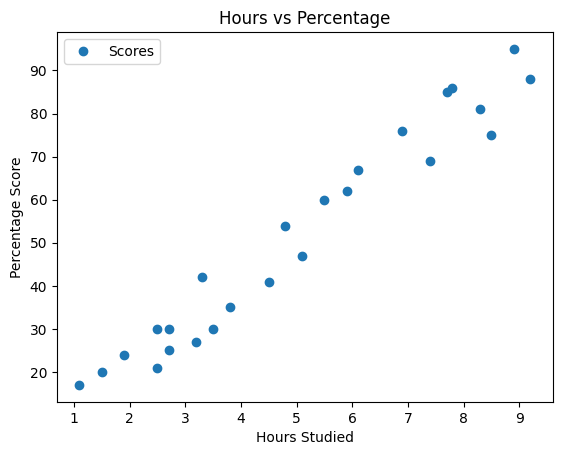

In [285]:
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

The above plot shows that our linearity assumption is not bad because the data does seem to be lie along a straight line. 

### As a first step towards building our linear regression model, we will split out data into train and test sets

In [286]:
from sklearn.model_selection import train_test_split

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values



In the above cell, we have separated the features (X) and the labels (Y), and have imported the train_test_split from sklearn which we will use to split our data. You can read more about it https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [287]:
# Splitting the dataset into train (80%) / test sets (20%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Let's build our Linear Regression Model

For this we will use the LinearRegression class of sklearn. You can read more about this class at https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

In [288]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

# Training the regressor model on the X_train and y_train is achieved by calling the fit function.
regressor.fit(X_train, y_train)


LinearRegression()

In [289]:
# Now that we have fit our model, let's print its slope and intercept

print(regressor.intercept_)
print(regressor.coef_)

2.0181600414346974
[9.91065648]


Before we evaluate our model on the test set, let's see how good our model fits the train data by plotting it against the training data.

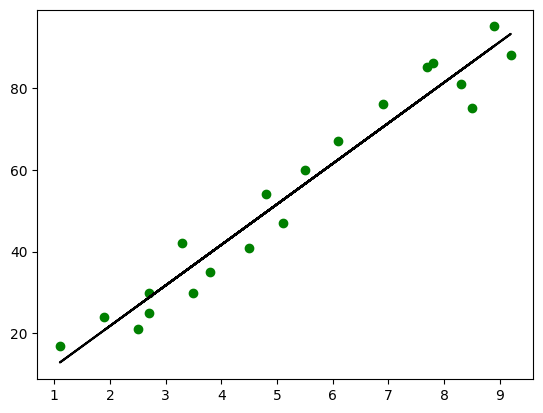

In [290]:
y_pred = regressor.predict(X_train)
plt.scatter(X_train, y_train,color='g') 

plt.plot(X_train, y_pred,color='k') 

plt.show()

Thus we can see that our model is doing a good job at explaining our training data as the line (our model) is nicely fitting the data. However, do not forget that the actual evaluation should be done on the test data.

### Let's evaluate our Linear Regression Model

Let's see how good our model is by evaluating its performance on the test dataset. For this we will use the predict() function to make predictions on the test data.

In [291]:
# Storing the result of prediction into y_pred variable,
y_pred = regressor.predict(X_test)

# for comparison purpose, let's store both the actual labels and the predicted labels in a dataframe
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Now we will quantify the performance of our model using the root mean squared error, mean absolute error and coefficient of determination $R^2$.

MAE:

![MAE formula](res/mae_formula.png "MAE formula")

MSE:

![MSE formula](res/mse_formula.png "MSE formula")

MSE:

![RMSE formula](res/rmse.png "RMSE formula")


Task for you: Use the following resource to read more about these metrics. 

https://scikit-learn.org/stable/modules/model_evaluation.html

In [292]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root Mean Squared Error: 4.647447612100367


## Encoding Categorical Data (Converting categorical data to numbers)

In real-life, our datasets do not have just the numerical features. In fact, it is quite common to have categorical features (such as color, city, or customer type) in our problems. Before we can train machine learning models using such features, it is important to convert them into a suitable numerical form. There are two common approaches for converting ordinal and categorical variables to numerical values. They are:

- Ordinal Encoding
- One-Hot Encoding

### Ordinal Encoding

In ordinal encoding, each unique category value is assigned an integer value.

For example, “red” is 1, “green” is 2, and “blue” is 3.

This is called an ordinal encoding or an integer encoding and is easily reversible. Often, integer values starting at zero are used.

In [293]:
# example of a ordinal encoding
from numpy import asarray
# define data
data = asarray([['red'], ['green'], ['blue']])
print(data)

[['red']
 ['green']
 ['blue']]


Let's convert the above categorical data into numerical via OrdinalEncoder class. You can read about it at https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder

In [294]:
from sklearn.preprocessing import OrdinalEncoder
# define ordinal encoding
encoder = OrdinalEncoder()

# Transform categorical data into numerical via OrdinalEncoder
result = encoder.fit_transform(data)

print(result)

[[2.]
 [1.]
 [0.]]


When should not we use OrdinalEncoding? What are the disadvantages of it? 

For categorical variables where no ordinal relationship exists, the integer encoding may not be enough, at best, or misleading to the model at worst. Forcing an ordinal relationship via an ordinal encoding and allowing the model to assume a natural ordering between categories may result in poor performance or unexpected results (predictions halfway between categories).

However, if there exists an ordinal relationship among values, such as a feature whose values are (low, medium, high) than encoding these with OrdinalEncoder will preserve this relationship and allow the machine model to benefit from this information.

### One-Hot Encoding

One-hot encoding is a way of representing categorical variables as numerical data, so that they can be input into machine learning algorithms. It is called "one-hot" because only one of the elements in the vector is "hot" (has the value of 1) while the rest are 0.

For example, suppose you have a categorical variable with three categories: "red", "green", and "blue". You can one-hot encode this variable by creating a new binary vector with three elements, one for each category. If the original categorical value is "red", the one-hot encoded vector would be [1, 0, 0]. If the original categorical value is "green", the one-hot encoded vector would be [0, 1, 0], and so on.

One-hot encoding has several advantages:

1. It allows categorical data to be input into machine learning algorithms that expect numerical data.
2. It avoids the problem of assigning arbitrary numerical values to categories, which can sometimes lead to incorrect assumptions about the relationships between the categories.
3. It is easy to interpret, since each element of the one-hot encoded vector corresponds to a specific category.
4. It allows for efficient computation, since only one element of the vector is non-zero.

However, one-hot encoding can also have some disadvantages. For example, it can lead to high-dimensional data, which can be computationally expensive to process and may require more data to achieve good results. Additionally, it does not capture any relationships between categories, which may be important for some types of machine learning models.

In [295]:
# example of a one hot encoding
from numpy import asarray
# define data
data = asarray([['red'], ['green'], ['blue']])
print(data)

[['red']
 ['green']
 ['blue']]


Let's convert the above categorical data into numerical via OneHotEncoder class. You can read more about it at https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder

In [296]:
from sklearn.preprocessing import OneHotEncoder

# define one hot encoding
encoder = OneHotEncoder(handle_unknown='ignore')
# Transform categorical data into numerical via OneHotEncoder
onehot = encoder.fit_transform(data)

print(onehot)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3 stored elements and shape (3, 3)>
  Coords	Values
  (0, 2)	1.0
  (1, 1)	1.0
  (2, 0)	1.0


## Data Scaling

Data scaling is the process of transforming the values of numeric variables so that they have a common scale, without distorting the differences in the ranges of the variables or the relationships between them. It is an important step in preparing data for machine learning algorithms, because many algorithms assume that the variables on which they are trained are on a common scale.

There are several reasons why data scaling is important:

Algorithms that are sensitive to the scale of the input data: Some machine learning algorithms are sensitive to the scale of the input data and perform better when the variables are on a common scale. For example, algorithms based on distance measures, such as k-nearest neighbors, are sensitive to the scale of the input data.

Avoiding bias in the feature space: When variables are on different scales, some variables may dominate the feature space and influence the model more than others. Data scaling helps to avoid this bias by putting all variables on a common scale, so that they contribute equally to the model.

Improving the interpretability of the model: When variables are on a common scale, it is easier to interpret the model coefficients, because they can be directly compared.

There are several ways to scale data, including standardization, normalization, and scaling to a range. The appropriate method will depend on the characteristics of the data and the requirements of the machine learning algorithm being used.

### Data scaling technique: Data normalization
Normalization is a rescaling of the data from the original range so that all values are within the range of 0 and 1 (or other ranges).

Normalization requires that you know or are able to accurately estimate the minimum and maximum observable values. You may be able to estimate these values from your available data.

The formula for normalization:

$x^{(i)}_{\operatorname{normalized}} =  \frac{x^{(i)} - min(X)}{max(X) - min(X)}$, where $X = [x_0, x_1, ... x_i, ... x_n]$

Example:
we will create a small dataset with two features having different ranges, and scale them using the normalization technique.

In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.DataFrame({'WEIGHT': [15, 18, 12,10],
                   'PRICE': [1,3,2,5]},
                   index = ['Orange','Apple','Banana','Grape'])
print(df)

        WEIGHT  PRICE
Orange      15      1
Apple       18      3
Banana      12      2
Grape       10      5


For normalization of the above dataset we will use the MinMaxScaler class. You can read more about it at https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler

In [298]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# apply min-max scaler to the df dataset, write one line code below

min_max_scaled_data = scaler.fit_transform(df)
df1 = pd.DataFrame(min_max_scaled_data, columns=['WEIGHT','PRICE'], index = ['Orange','Apple','Banana','Grape'])
print(df1)

        WEIGHT  PRICE
Orange   0.625   0.00
Apple    1.000   0.50
Banana   0.250   0.25
Grape    0.000   1.00


### Data scaling technique: Data Standardization

Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1. It is sometimes referred to as “whitening.”

This can be thought of as subtracting the mean value or centering the data.

Like normalization, standardization can be useful, and even required in some machine learning algorithms when your data has input values with differing scales.

Standardization assumes that your observations fit a Gaussian distribution (bell curve) with a well behaved mean and standard deviation. You can still standardize your data if this expectation is not met, but you may not get reliable results.

Standardization requires that you know or are able to accurately estimate the mean and standard deviation of observable values. You may be able to estimate these values from your training data.

The formula is:

$y = \frac{(x - mean)} {standard\_deviation}$

where:
- $mean = \frac{sum(x)}{count(x)}$
- $standard\_deviation = \sqrt{\frac{\sum (x - mean)^2}{count(x)}}$

Let's apply the standardscaler to the previous dataset to perform standardization. You can read more about it at https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler

In [299]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# apply standard scaler to the df dataset
scaled_df = scaler.fit_transform(df)

df2 = pd.DataFrame(scaled_df,
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape'])
print(df2)


          WEIGHT     PRICE
Orange  0.412393 -1.183216
Apple   1.402136  0.169031
Banana -0.577350 -0.507093
Grape  -1.237179  1.521278


#### Data standardization vs normalization, which one to use?


Standardization is useful when the data follows a normal distribution or when the scale of the variables is not important.

In general, standardization is a more widely used technique, but normalization may be preferred in some cases, such as when the data follows a skewed distribution or when the values of the variables have a specific range. It is always a good idea to explore both techniques and choose the one that works best for your data and machine learning algorithm.

### Polynomial Regression
Polynomial regression is a type of regression analysis in which the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial. 

Polynomial regression can be used to model relationships between variables that are not linear. It can also be used to model non-linear relationships between variables when the data is not well-represented by a linear model. However, polynomial regression can be prone to overfitting, especially when the degree of the polynomial is high. It is important to carefully choose the degree of the polynomial and use techniques such as cross-validation to avoid overfitting.

#### We will create a simple synthetic nonlinear dataset based on a simple quadratic equation

In [300]:
import numpy as np
import numpy.random as rnd
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

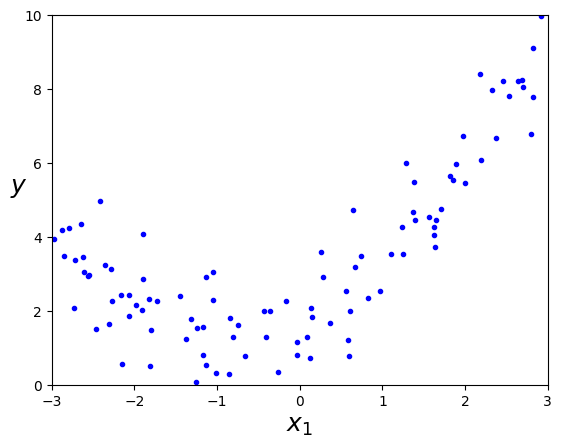

In [301]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

As we can see that the data does not follow a straight line relationship, instead is scatters along a curvy route indicating a non-linear relaionship between features and labels.

Clearly, a straight line will never fit this data properly. Therefore, we will fit a polynomial model to this data. It will be done in two steps:

1. First we will use Scikit-Learn’s PolynomialFeatures class to transform our training data, adding the square (2nd-degree polynomial) of each feature in the training set as new features.

You can read more about the PolynomialFeatures class at https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures

In [302]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

So we have transformed X (which are original features - note that there is just one feature) into X_poly which now contains two features: first is the original feature and the second one is the sqaure of the original feature.

In [303]:
X[0]

array([-0.75275929])

In [304]:
X_poly[0]

array([-0.75275929,  0.56664654])

2. Now that the features are ready, we will use the LinearRegression class to fit the model to this extended training data. 

Yes, you read that right. We are still using the LinearRegression class. The trick is that we are applying it to two features now, where one of the features is coming from a 2nd-degree polynomial. 

In [305]:
regressor = LinearRegression()
regressor.fit(X_poly, y)
print(regressor.intercept_)
print(regressor.coef_)

[1.78134581]
[[0.93366893 0.56456263]]


Let's see how well the model fits the data

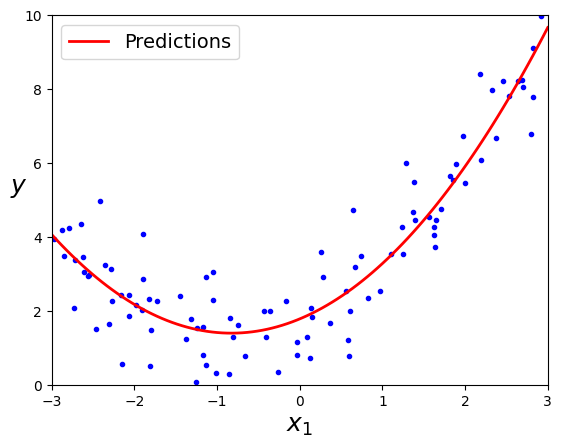

In [306]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = regressor.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

## Multiple linear regression - This is part of Challenge Activity

Q. What is Multiple Regression, and when do we use it?


Your Answer: 

In [307]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math

#### Dataset

As dataset, we will use the following dataset:
https://www.kaggle.com/mohansacharya/graduate-admissions

We have already downloaded the CSV of the dataset (Admission_Predict.csv) and we just load it through pandas:

In [308]:
mdf = pd.read_csv('res/Admission_Predict.csv')

Let's get familiar with the dataset.

In [309]:
mdf.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [310]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


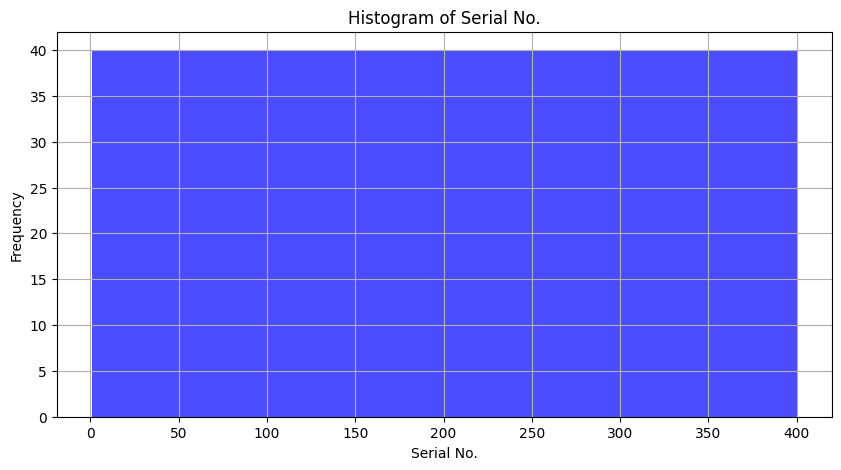

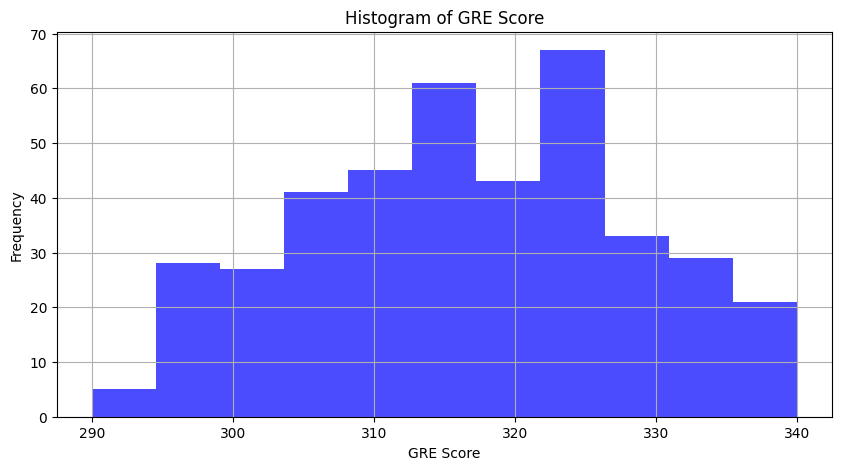

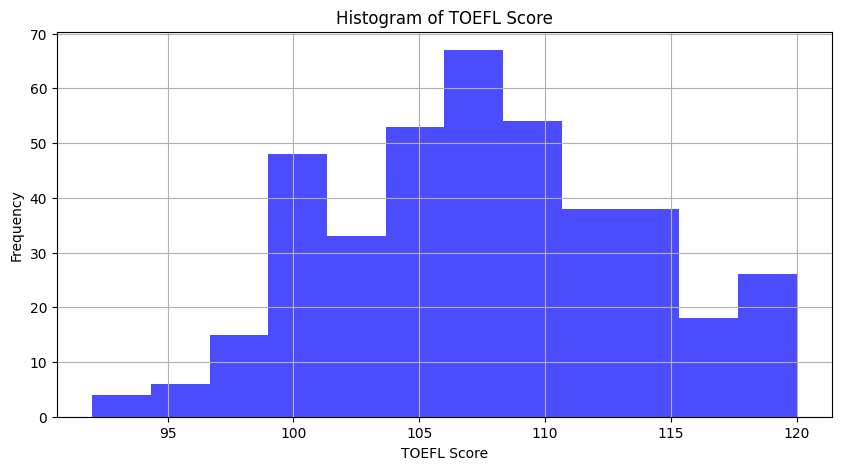

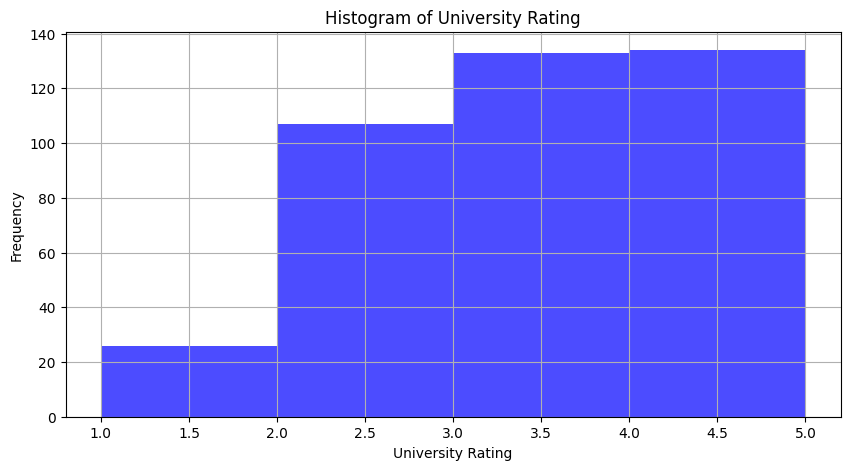

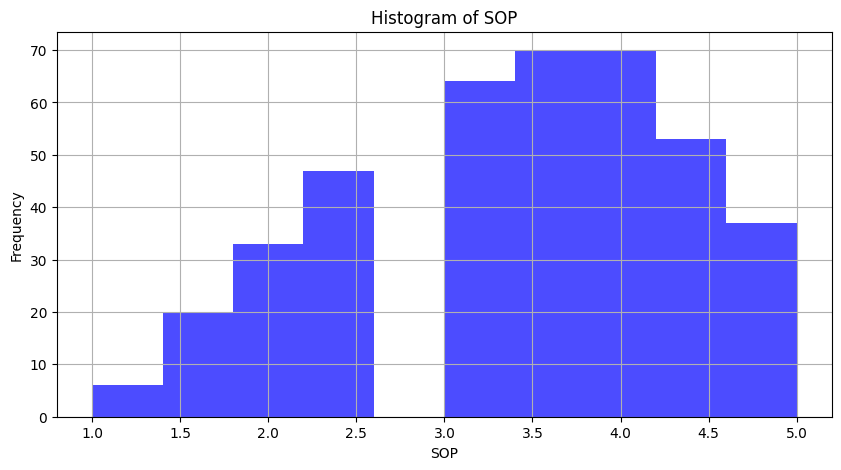

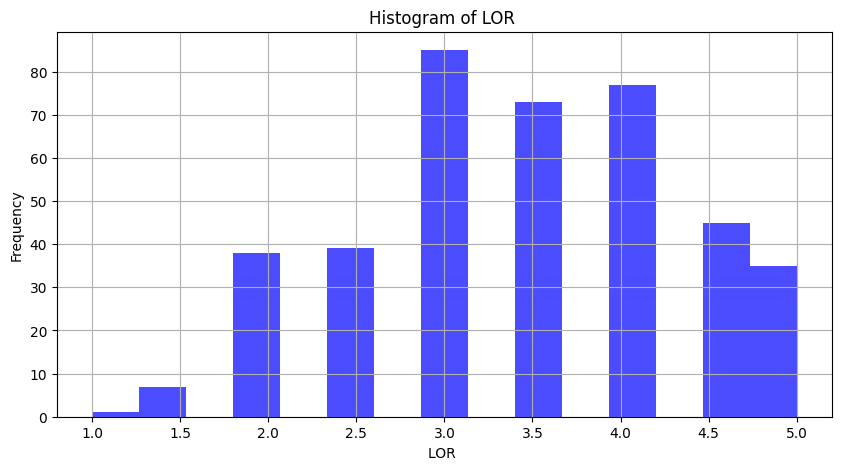

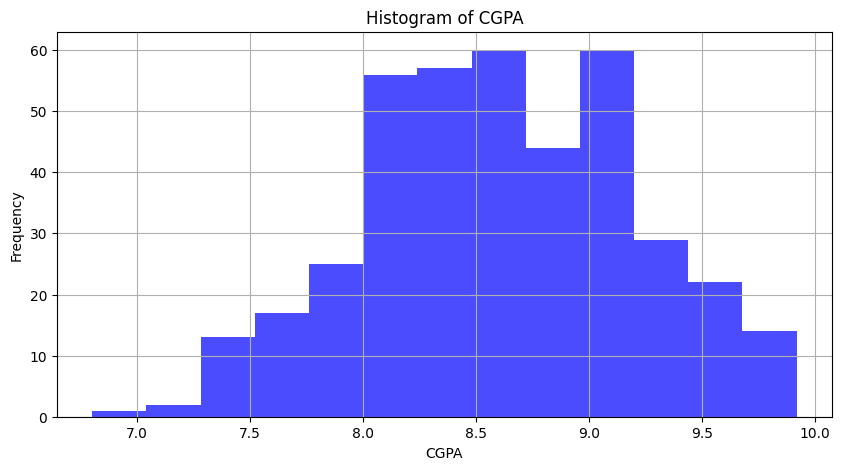

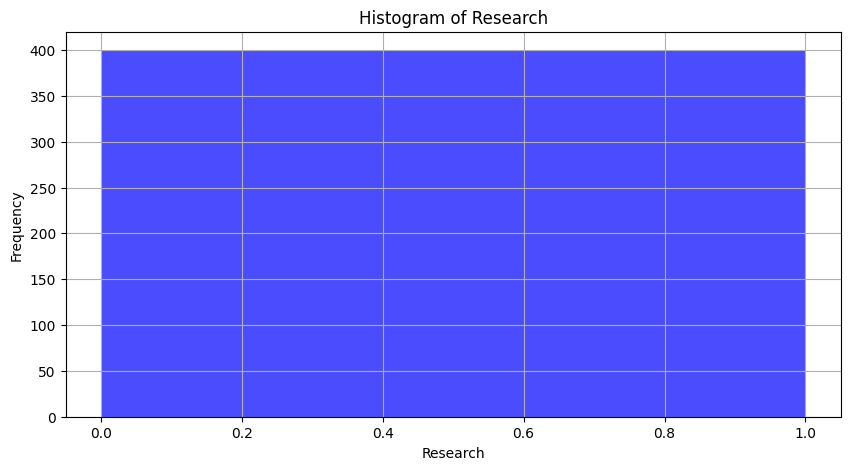

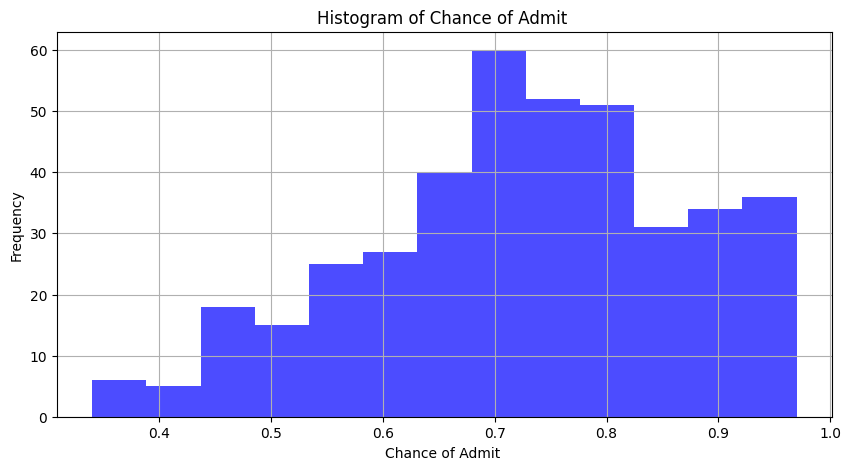

In [311]:
for column in mdf.columns:
    plt.figure(figsize=(10, 5))
    plt.hist(mdf[column], bins='auto', color='blue', alpha=0.7)
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()


In [312]:
correlation_matrix = mdf.corr()
print(correlation_matrix['Chance of Admit '])

Serial No.           0.042336
GRE Score            0.802610
TOEFL Score          0.791594
University Rating    0.711250
SOP                  0.675732
LOR                  0.669889
CGPA                 0.873289
Research             0.553202
Chance of Admit      1.000000
Name: Chance of Admit , dtype: float64


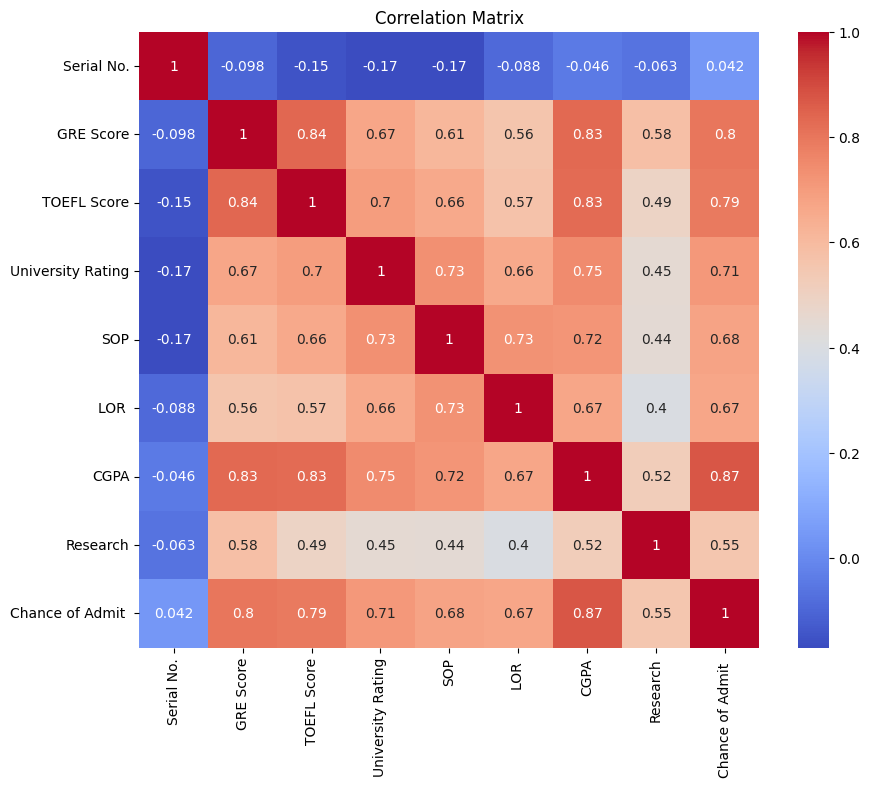

In [313]:
plt.figure(figsize=(10, 8))
sns.heatmap(mdf.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Task:
Separate the features into X and labels into Y.

In [314]:
# write your code here
from sklearn.model_selection import train_test_split

#X = df.iloc[:, :-1].values
#y = df.iloc[:, 1].values


X = mdf[['CGPA', 'GRE Score', 'TOEFL Score']]
y = mdf['Chance of Admit ']


### Task:
Perform data normalization

In [321]:
#standardisation instead

from sklearn.preprocessing import StandardScaler

#Intialise the StandardScaler object

stanScaler = StandardScaler()

#fit the scaler to data, then transform

X_scaled = stanScaler.fit_transform(X)

print(X_scaled)

[[ 1.76481828  1.76210664  1.74697064]
 [ 0.45515126  0.62765641 -0.06763531]
 [-1.00563118 -0.07046681 -0.56252785]
 ...
 [ 1.42900622  1.15124883  1.41704229]
 [ 0.30403584 -0.41952842 -0.72749202]
 [ 1.78160888  1.41304503  1.58200646]]


### Task:
Split the data into train (80%) and test (20%) sets

In [ ]:
# write your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Task:
Fit a linear regression model to your data, and print the intercept and coefficients

In [317]:
# write your code here

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# apply min-max scaler to the df dataset, write one line code below

min_max_scaled_data = scaler.fit_transform(df)
df1 = pd.DataFrame(min_max_scaled_data, columns=['WEIGHT','PRICE'], index = ['Orange','Apple','Banana','Grape'])
print(df1)



        WEIGHT  PRICE
Orange   0.625   0.00
Apple    1.000   0.50
Banana   0.250   0.25
Grape    0.000   1.00


### Task:
Make predictions on the test data and assess the performance of your model using MAE, MSE, and RMSE

In [318]:
# write your code here

## References:
- https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/
- https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35